# Bank GoodCredit

### Project Ref: PM-PR-0015

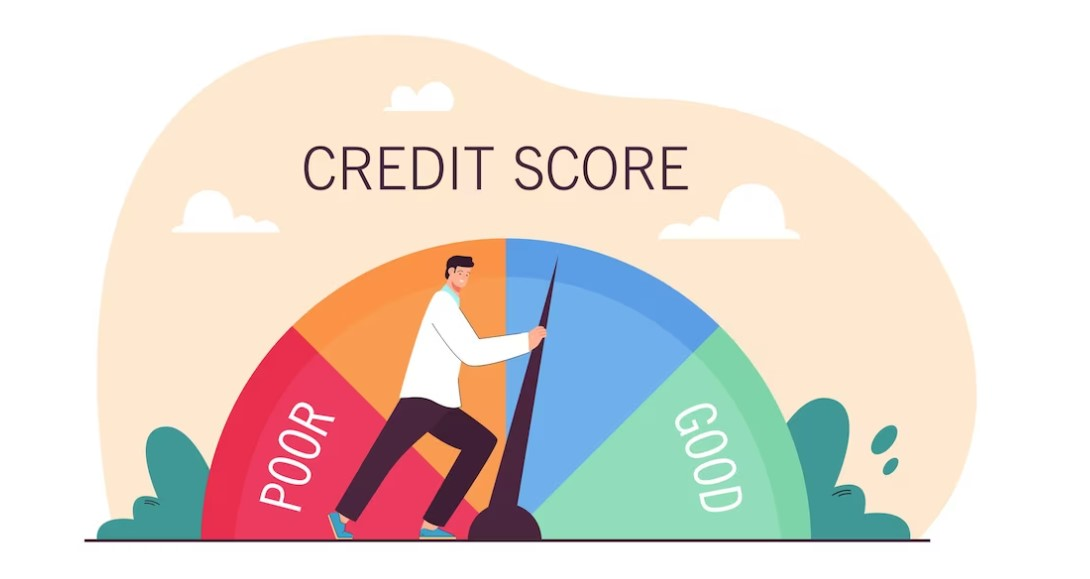

- ### Introduction

In today's financial landscape, the assessment of an individual's creditworthiness is a critical component of the lending process. Financial institutions, such as banks, rely on credit scores to make informed decisions regarding loan approvals, interest rates, and credit limits. The ability to accurately predict creditworthiness not only reduces the risk of default but also ensures fair and responsible lending practices.

This data science project, titled "Bank Credit Score," is dedicated to developing a robust and predictive credit scoring model. By leveraging a diverse dataset that includes a variety of demographic, financial, and behavioral features, we aim to create a credit scoring system that enhances the accuracy and fairness of credit assessments.

The objectives of this project are threefold:

Data Collection and Preparation: We will gather a comprehensive dataset encompassing a wide range of customer attributes, transaction history, and credit outcomes. This dataset will be cleaned, preprocessed, and transformed to ensure its suitability for modeling.

- `Model Development`: Using state-of-the-art machine learning techniques and predictive modeling, we will construct a robust credit scoring model. This model will be trained on historical data, learning the patterns and relationships that influence creditworthiness.

- `Model Evaluation and Deployment`: The final model's performance will be rigorously evaluated using various metrics, ensuring its reliability and accuracy. Upon successful validation, the model will be prepared for deployment, enabling banks to integrate it into their decision-making processes.

### Problem statement

- The existing credit scoring model used by our institution, while effective to some extent, is in need of enhancement to reduce the rate of false positives and negatives in credit assessments.
- The goal is to develop a more accurate and data-driven credit scoring model that can provide a nuanced evaluation of applicants' creditworthiness, taking into account various factors beyond traditional credit history.

### Business case

- Our existing credit scoring model, while effective, requires improvement to reduce default rates, optimize interest rate determination, and incorporate non-traditional factors for a more comprehensive credit assessment.

### Background of the project

- In the world of finance and lending, the process of evaluating individuals and businesses for creditworthiness is fundamental to responsible lending practices. Our bank, a long-standing institution known for its commitment to customers and financial stability, recognizes the need to modernize and improve its credit scoring model. This background provides context for the project aimed at enhancing our bank's credit scoring system.

##### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df1 = pd.read_csv('Full_Join_Cleaned.csv')

In [3]:
df1

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,...,feature_78.1,feature_79,tot_high_credit_amt,tot_cur_balance_amt,total_amt_past_due,tot_creditlimit,tot_cashlimit,enq_amt,total_enq_count,Bad_label
0,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,...,1.0,N,7900063.0,4714857,2538209.0,670000.0,168000.0,4981150,18,0
1,2,Insignia,1.0,Card Setup,14.0,1200000.0,Y,1.0,N,1.0,...,1.0,N,1117595.0,30754,0.0,1000000.0,1.0,6676682006,68,0
2,3,Insignia,1.0,Card Setup,14.0,700000.0,Y,2.0,N,1.0,...,1.0,N,121523.0,17864,0.0,0.0,0.0,3400000,1,0
3,4,Insignia,1.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,...,1.0,N,12304664.0,1845569,0.0,956000.0,361000.0,50810000,34,0
4,5,Insignia,3.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,...,1.0,N,12817505.0,7973,0.0,0.0,0.0,2000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23876,23892,Platinum Deligh,1.0,Card Setup,14.0,119000.0,Y,1.0,N,2.0,...,1.0,N,772824.0,485225,0.0,149000.0,39700.0,1570344,16,0
23877,23893,Platinum Deligh,2.0,Card Setup,14.0,35000.0,Y,1.0,N,2.0,...,1.0,N,27314.0,16393,0.0,0.0,0.0,239010,12,0
23878,23894,Platinum Maxima,3.0,Card Setup,14.0,68000.0,Y,1.0,Y,2.0,...,1.0,N,48841.0,2077,0.0,14000.0,7000.0,102000,4,0
23879,23895,Platinum Deligh,3.0,Card Setup,14.0,158000.0,Y,1.0,N,1.0,...,1.0,N,746015.0,370758,0.0,164000.0,39700.0,727000,8,0


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df1.head(3)

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_78,feature_78.1,feature_79,tot_high_credit_amt,tot_cur_balance_amt,total_amt_past_due,tot_creditlimit,tot_cashlimit,enq_amt,total_enq_count,Bad_label
0,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,others,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,400610.0,0.0,2.0,90000.0,21.0,R,1.0,1.0,N,7900063.0,4714857,2538209.0,670000.0,168000.0,4981150,18,0
1,2,Insignia,1.0,Card Setup,14.0,1200000.0,Y,1.0,N,1.0,2.0,others,560042.0,1969.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,560042.0,PAN Card,The Ratnakar Bank Ltd.,1.0,17.0,Y,Y,N,Y,17.0,560042.0,0.0,2.0,1.0,17.0,R,1.0,1.0,N,1117595.0,30754,0.0,1000000.0,1.0,6676682006,68,0
2,3,Insignia,1.0,Card Setup,14.0,700000.0,Y,2.0,N,1.0,0.0,others,560042.0,1966.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,560042.0,PAN Card,others,3.0,17.0,N,Y,N,Y,17.0,560042.0,0.0,2.0,1.0,17.0,R,1.0,1.0,N,121523.0,17864,0.0,0.0,0.0,3400000,1,0


### Domain Analysis

#### The dataset contains the following information:

- `customer_no`:- n a financial or business context, "customer_no" typically refers to a unique identifier or customer number assigned to individual customers or clients by a company or organization. This identifier serves as a way to distinguish and track each customer within the company's database or records.

- `feature_1`:-  The features you've mentioned appear to be related to credit card offerings or product names. Let's briefly explain each of them:

- Insignia: Insignia is likely the name of a premium or high-tier credit card offered by a financial institution. Cards with names like "Insignia" often come with exclusive benefits, higher credit limits, and tailored services for affluent customers.

- Platinum Delight: "Platinum Delight" suggests a credit card that provides certain privileges and benefits to cardholders, such as cashback rewards, discounts, or access to airport lounges. Platinum cards are typically associated with higher credit limits.

- Platinum Maxima: Similar to "Platinum Delight," "Platinum Maxima" likely represents a credit card with premium perks and features. The exact benefits may vary depending on the financial institution offering it.

- Golf Card: A "Golf Card" is a specialized credit card designed for individuals who enjoy playing golf. It often includes golf-related benefits such as discounted greens fees, access to golf clubs, or even complimentary rounds of golf.

- Titanium Delight: Much like "Platinum Delight," "Titanium Delight" signifies a credit card with privileges tailored to the cardholder, possibly including cashback offers, dining discounts, or travel benefits.

- Platinum Cricket: This card could be associated with cricket-related perks, such as discounts on tickets for cricket matches, exclusive access to cricket events, or merchandise discounts for cricket enthusiasts.

- RBL Bank Fun+: "RBL Bank Fun+" appears to be a credit card product offered by RBL Bank. It might be designed to provide cardholders with entertainment-related benefits, including discounts on movie tickets, dining, or other leisure activities.

- `feature_5`:- The term "Card Setup" typically refers to the process or configuration involved in setting up and activating a credit or payment card for use. It encompasses various steps and considerations

- `feature_11`:- Y/N

- `feature_27`:- In this feature about Education/Profession others, CA, Graduate, Post-Graduate, Professional, MBA/MMS, Diploma, Others, Doctor, Engineer, Architect.

- `feature_30`:- About year 1965, 1969, 1966, 1988, 1995, 2000, 1964, 1977, 2007, 2012, 1978, 1999, 1990, 2010, 2009., 1970, 1975, 1980, 1981, 1976, 1979, 1985, 2013, 2005, 2004, 2014, 1991, 2003, 2008, 2015, 2011, 1993, 1992, 1998, 2002, 2001, 1989, 1982, 2006, 1994, 1986, 1987, 1984, 1983, 1968, 1997, 1972, 1967, 1996, 1973, 1974, 1971

- `feature_32`:- These categories provide insights into the housing situations or living arrangements of the individuals in the dataset.

- `feature_46`:- This about the about identification submitted like PAN Card, others, Aadhar Card, Passport, Driving License, Voter ID

- `feature_48`:- Feature about persons bank details like where holding an account

### Basic checks

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23881 entries, 0 to 23880
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_no          23881 non-null  int64  
 1   feature_1            23881 non-null  object 
 2   feature_4            23881 non-null  float64
 3   feature_5            23881 non-null  object 
 4   feature_6            23881 non-null  float64
 5   feature_7            23881 non-null  float64
 6   feature_11           23881 non-null  object 
 7   feature_19           23881 non-null  float64
 8   feature_23           23881 non-null  object 
 9   feature_25           23881 non-null  float64
 10  feature_26           23881 non-null  float64
 11  feature_27           23881 non-null  object 
 12  feature_29           23881 non-null  float64
 13  feature_30           23881 non-null  float64
 14  feature_31           23881 non-null  float64
 15  feature_32           23881 non-null 

In [7]:
df1.describe()

,customer_no,feature_4,feature_6,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_40,feature_41,feature_42,feature_44,feature_55,feature_56,feature_64,feature_66,feature_67,feature_68,feature_69,feature_71,feature_78,feature_78.1,tot_high_credit_amt,tot_cur_balance_amt,total_amt_past_due,tot_creditlimit,tot_cashlimit,enq_amt,total_enq_count,Bad_label
count,23881.000000,23881.000000,23881.0,2.388100e+04,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,23881.000000,23881.000000,2.388100e+04,2.388100e+04,2.388100e+04,2.388100e+04,2.388100e+04,2.388100e+04,23881.000000,23881.000000
mean,11948.324693,2.321595,14.0,1.190705e+05,1.049412,1.233910,0.725640,217620.229346,2001.183996,0.652318,1.238851,3.278933e+04,3.348352,5.702609,0.154139,222251.238474,1.085717,13.337465,14.587454,264374.021440,0.184373,1.238851,3.278933e+04,14.539048,1.043214,1.043214,1.304098e+06,5.958244e+05,9.475483e+02,1.544336e+05,3.043143e+04,1.432725e+07,17.283238,0.042000
std,6899.017069,0.892838,0.0,7.752349e+04,0.216731,0.423324,1.124986,159267.102213,11.993426,2.343709,0.430009,1.087860e+05,3.587043,4.159316,0.930806,156846.154943,0.388569,8.285993,9.518517,202001.890433,0.387796,0.430009,1.087860e+05,9.077906,0.224672,0.224672,5.328781e+06,2.241140e+06,4.140506e+04,2.314854e+05,5.121369e+04,1.118551e+08,15.253437,0.200593
min,1.000000,1.000000,14.0,0.000000e+00,1.000000,1.000000,0.000000,110001.000000,1964.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,110001.000000,0.000000,1.000000,1.000000e+00,2.000000,1.000000,1.000000,0.000000e+00,-6.994576e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5973.000000,1.000000,14.0,7.200000e+04,1.000000,1.000000,0.000000,110051.000000,1991.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,0.000000,110044.000000,1.000000,10.000000,10.000000,110059.000000,0.000000,1.000000,1.000000e+00,10.000000,1.000000,1.000000,1.607830e+05,3.999000e+04,0.000000e+00,3.800000e+04,2.900000e+03,3.710000e+05,7.000000,0.000000
50%,11946.000000,3.000000,14.0,1.040000e+05,1.000000,1.000000,0.000000,110094.000000,2005.000000,0.000000,1.000000,3.000000e+04,2.000000,6.000000,0.000000,122001.000000,1.000000,10.000000,10.000000,122012.000000,0.000000,1.000000,3.000000e+04,10.000000,1.000000,1.000000,4.426580e+05,1.527250e+05,0.000000e+00,1.000000e+05,1.600000e+04,1.281008e+06,13.000000,0.000000
75%,17922.000000,3.000000,14.0,1.390000e+05,1.000000,1.000000,2.000000,390002.000000,2011.000000,0.000000,1.000000,4.300000e+04,6.000000,10.000000,0.000000,390002.000000,1.000000,13.000000,21.000000,400601.000000,0.000000,1.000000,4.300000e+04,17.000000,1.000000,1.000000,1.134804e+06,4.705090e+05,0.000000e+00,1.870000e+05,3.480000e+04,4.011150e+06,23.000000,0.000000
max,23896.000000,3.000000,14.0,1.217000e+06,2.000000,2.000000,10.000000,712245.000000,2015.000000,12.000000,3.000000,1.500000e+07,12.000000,11.000000,11.000000,712201.000000,4.000000,35.000000,35.000000,874401.000000,1.000000,3.000000,1.500000e+07,35.000000,3.000000,3.000000,5.049994e+08,1.559473e+08,4.869309e+06,8.717506e+06,1.099000e+06,7.119712e+09,308.000000,1.000000


In [8]:
df1.describe(include = 'O')

,feature_1,feature_5,feature_11,feature_23,feature_27,feature_32,feature_33,feature_36,feature_37,feature_46,feature_48,feature_58,feature_59,feature_60,feature_62,feature_72,feature_79
count,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881
unique,7,1,2,2,11,5,2,10,12,6,57,2,2,2,2,2,2
top,Platinum Maxima,Card Setup,Y,N,Graduate,Self,Y,Private Ltd. Co.,Banking/Financial Services,PAN Card,others,N,Y,N,Y,R,N
freq,9056,23881,22611,21528,14610,10833,19478,8677,13187,22796,18384,23425,22611,23563,23876,15617,23876


<function matplotlib.pyplot.show(close=None, block=None)>

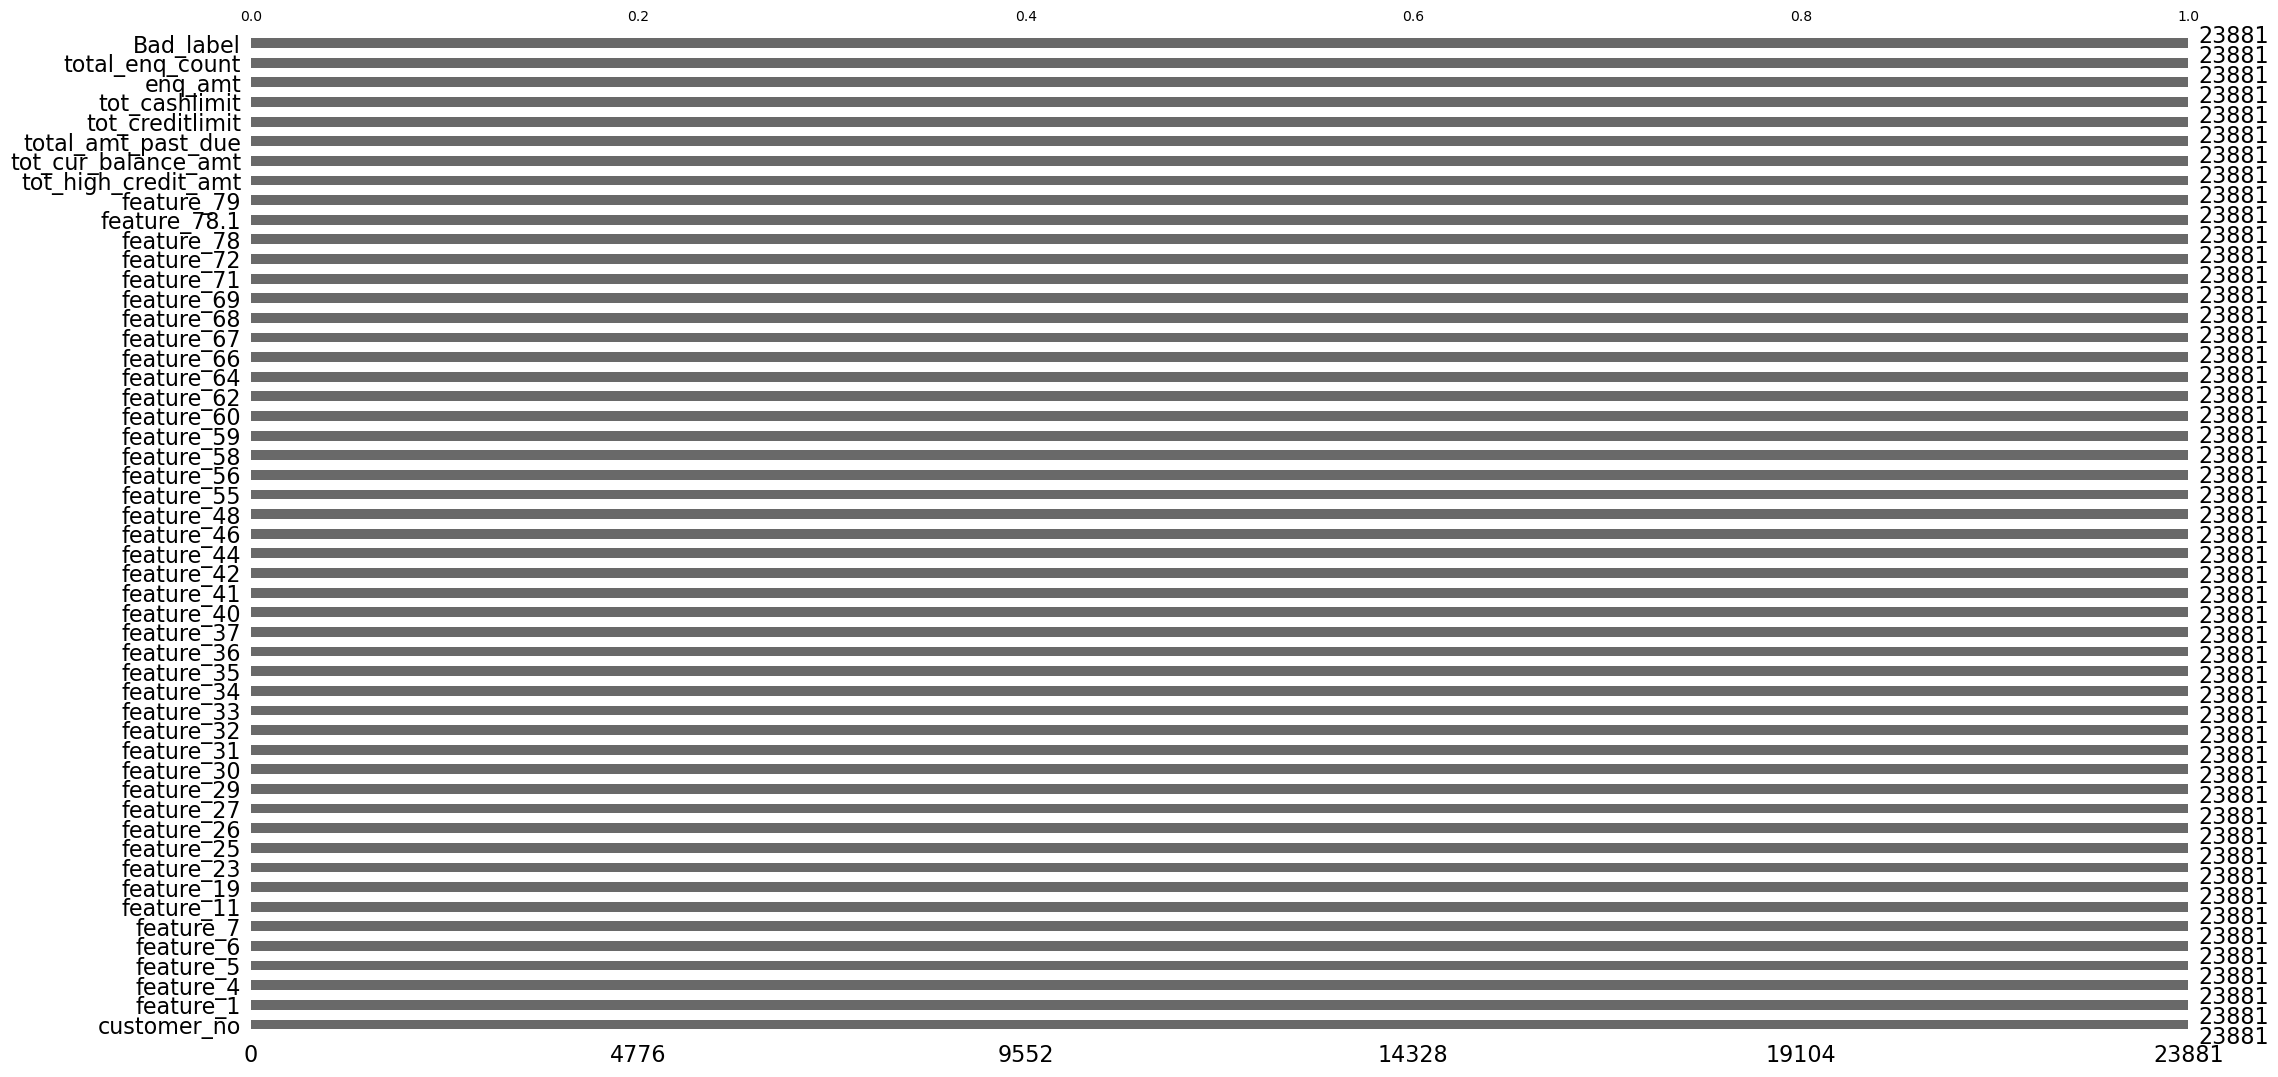

In [9]:
import missingno as msno
msno.bar(df1)
plt.show

## Exploratory data analysis

#### univariate analyis

In [10]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(df1)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='feature_1', ylabel='count'>

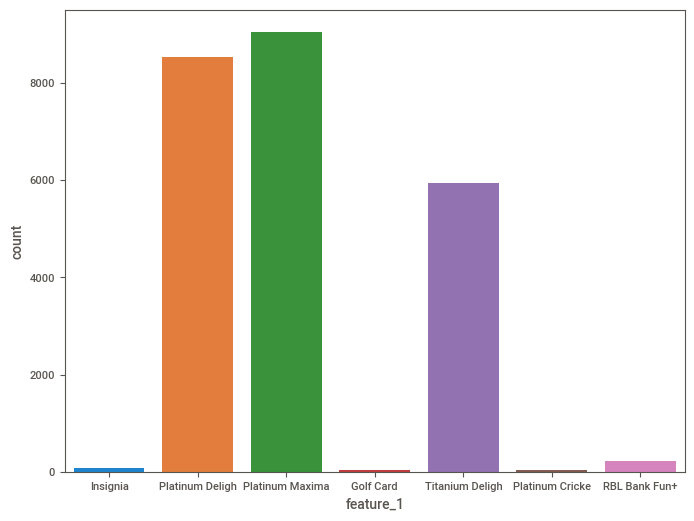

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot('feature_1', data=df1)

### Bivariate Analysis

<AxesSubplot:xlabel='feature_1', ylabel='Count'>

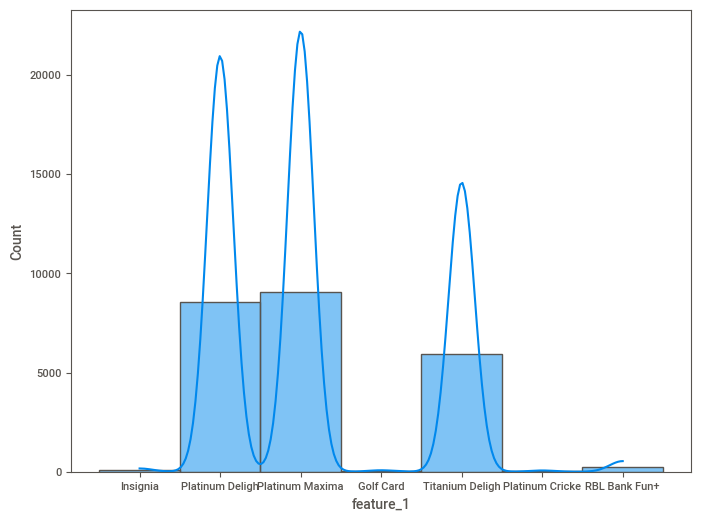

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(x = 'feature_1', data=df1, kde = 'Bad_label')

In [28]:
df1.columns

Index(['customer_no', 'feature_1', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_11', 'feature_19', 'feature_23', 'feature_25',
       'feature_26', 'feature_27', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_40', 'feature_41', 'feature_42', 'feature_44',
       'feature_46', 'feature_48', 'feature_55', 'feature_56', 'feature_58',
       'feature_59', 'feature_60', 'feature_62', 'feature_64', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_72',
       'feature_78', 'feature_78.1', 'feature_79', 'tot_high_credit_amt',
       'tot_cur_balance_amt', 'total_amt_past_due', 'tot_creditlimit',
       'tot_cashlimit', 'enq_amt', 'total_enq_count', 'Bad_label'],
      dtype='object')

<AxesSubplot:xlabel='feature_36', ylabel='Count'>

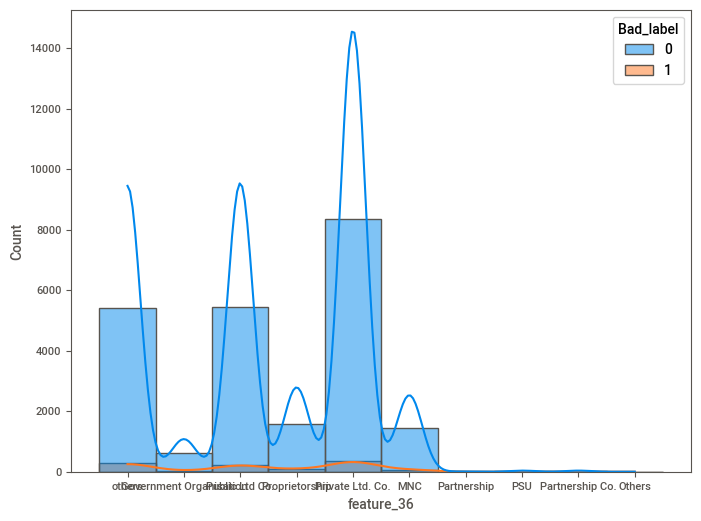

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df1.feature_36, hue = df1.Bad_label, kde = True)

In [43]:
df1.drop('feature_6', inplace = True, axis=1)

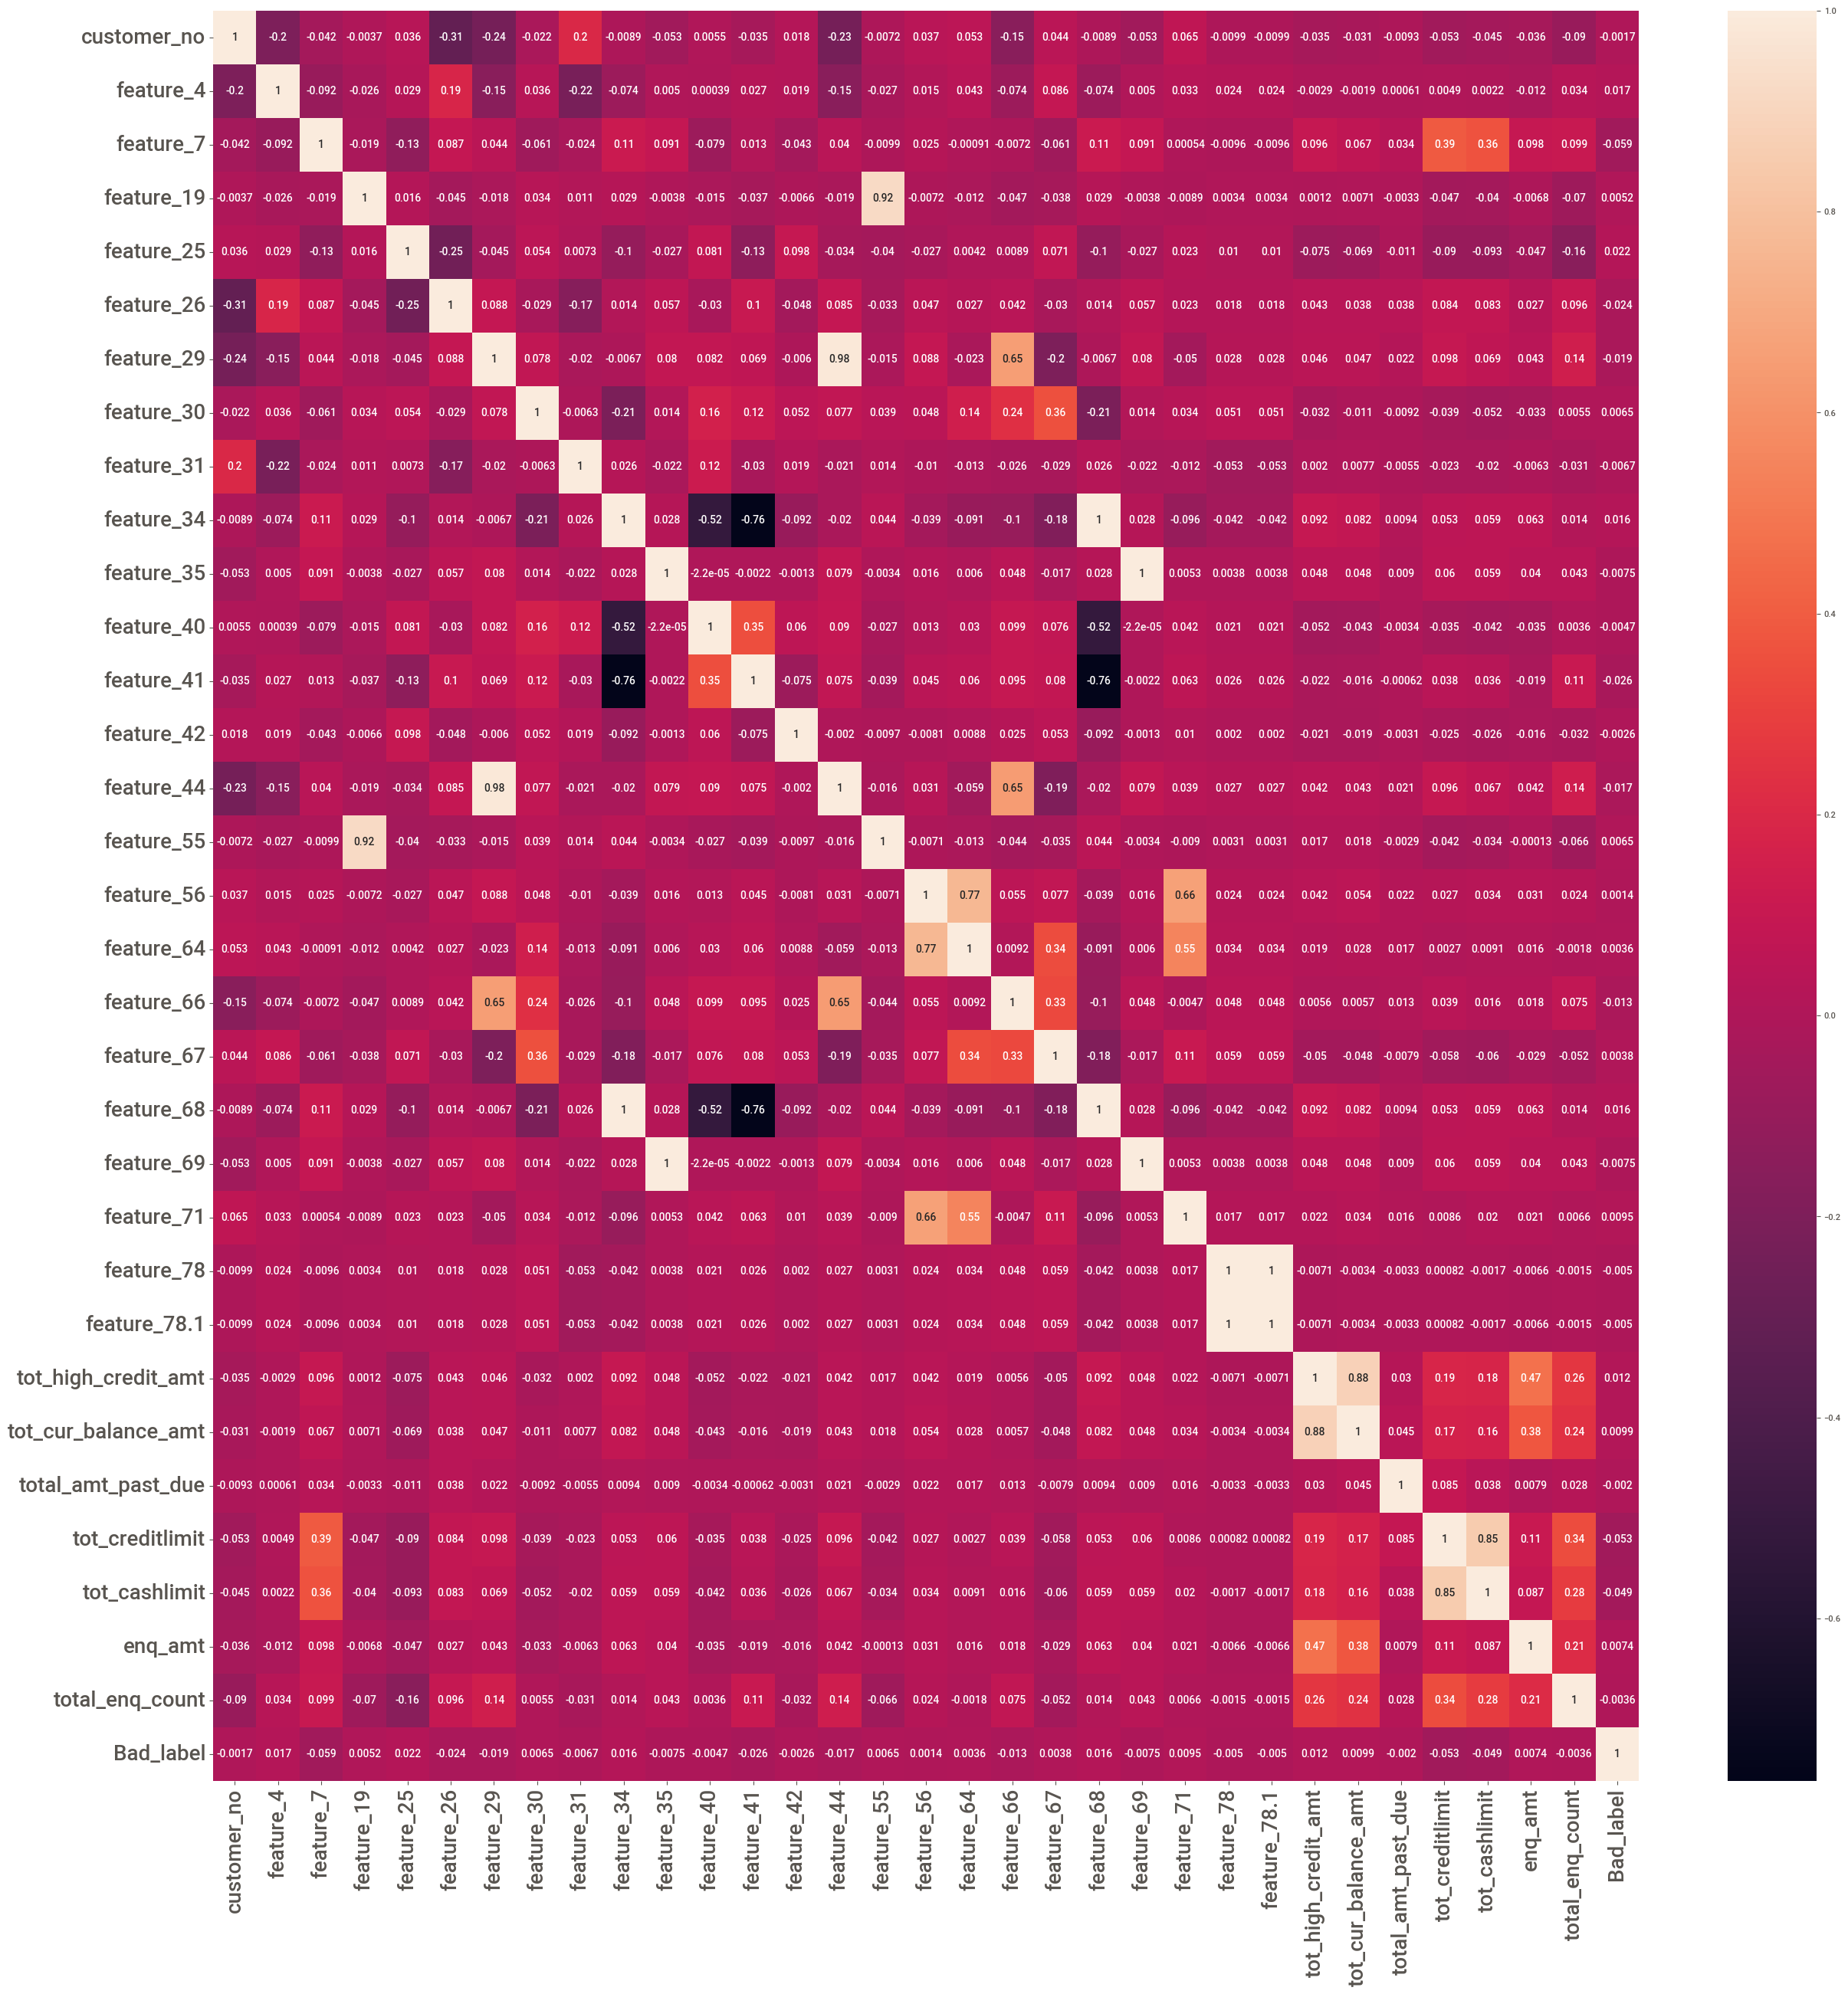

In [44]:
plt.figure(figsize=(30, 30))
sns.heatmap(df1.corr(), annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()